# Creating a Siamese model: Ungraded Lecture Notebook

In this notebook you will learn how to create a siamese model in TensorFlow.

In [1]:
import numpy as np
import tensorflow as tf

import logging
tf.get_logger().setLevel(logging.ERROR)

# Setting random seeds
np.random.seed(10)

## Siamese Model

To create a `Siamese` model you will first need to create a LSTM model. For this you can stack layers using the`Sequential` model. To retrieve the output of both branches of the Siamese model, you can concatenate results using the `Concatenate` layer. You should be familiar with the following layers (notice each layer can be clicked to go to the docs):
   - [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) groups a linear stack of layers into a [`tf.keras.Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model)
   - [`Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) Maps positive integers into vectors of fixed size. It will have shape (vocabulary length X dimension of output vectors). The dimension of output vectors (called `model_dimension`in the code) is the number of elements in the word embedding. 
   - [`LSTM`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) The Long Short-Term Memory (LSTM) layer. The number of units should be specified and should match the number of elements in the word embedding. 
   - [`GlobalAveragePooling1D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling1D) Computes global average pooling, which essentially takes the mean across a desired axis. GlobalAveragePooling1D uses one tensor axis to form groups of values and replaces each group with the mean value of that group. 
   - [`Lambda`](https://trax-ml.readthedocs.io/en/latest/trax.layers.html#trax.layers.base.Fn)  Layer with no weights that applies the function f, which should be specified using a lambda syntax. You will use this layer to apply normalization with the function
        - `tf.math.l2_normalize(x)`
        
- [`Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate) Layer that concatenates a list of inputs. This layer will concatenate the normalized outputs of each LSTM into a single output for the model.
- [`Input`](https://www.tensorflow.org/api_docs/python/tf/keras/Input): it is used to instantiate a Keras tensor.. Remember to set correctly the dimension and type of the input, which are batches of questions. 


Putting everything together the Siamese model will look like this:

In [2]:
vocab_size = 500
model_dimension = 128

# Define the LSTM model
LSTM = tf.keras.Sequential()
LSTM.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=model_dimension))
LSTM.add(tf.keras.layers.LSTM(units=model_dimension, return_sequences = True))
LSTM.add(tf.keras.layers.AveragePooling1D())
LSTM.add(tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x)))

input1 = tf.keras.layers.Input((None,))
input2 = tf.keras.layers.Input((None,))

# Concatenate two LSTMs together
conc = tf.keras.layers.Concatenate(axis=1)((LSTM(input1), LSTM(input2)))
    

# Use the Parallel combinator to create a Siamese model out of the LSTM 
Siamese = tf.keras.Model(inputs=(input1, input2), outputs=conc)

# Print the summary of the model
Siamese.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 sequential (Sequential)     (None, None, 128)            195584    ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, None, 128)            0         ['sequential[0][0]',      

Next is a helper function that prints information for every layer:

In [3]:
def show_layers(model, layer_prefix):
    print(f"Total layers: {len(model.layers)}\n")
    for i in range(len(model.layers)):
        print('========')
        print(f'{layer_prefix}_{i}: {model.layers[i]}\n')

print('Siamese model:\n')
show_layers(Siamese, 'Parallel.sublayers')

print('Detail of LSTM models:\n')
show_layers(LSTM, 'Serial.sublayers')

Siamese model:

Total layers: 4

Parallel.sublayers_0: <keras.src.engine.input_layer.InputLayer object at 0x000001BFC7B2FFD0>

Parallel.sublayers_1: <keras.src.engine.input_layer.InputLayer object at 0x000001BFC7B2FEB0>

Parallel.sublayers_2: <keras.src.engine.sequential.Sequential object at 0x000001BFAF0242B0>

Parallel.sublayers_3: <keras.src.layers.merging.concatenate.Concatenate object at 0x000001BFC7B2F9D0>

Detail of LSTM models:

Total layers: 4

Serial.sublayers_0: <keras.src.layers.core.embedding.Embedding object at 0x000001BF9F67BE50>

Serial.sublayers_1: <keras.src.layers.rnn.lstm.LSTM object at 0x000001BFC7B2D540>

Serial.sublayers_2: <keras.src.layers.pooling.average_pooling1d.AveragePooling1D object at 0x000001BFC7B2E740>

Serial.sublayers_3: <keras.src.layers.core.lambda_layer.Lambda object at 0x000001BFC7B2F8E0>



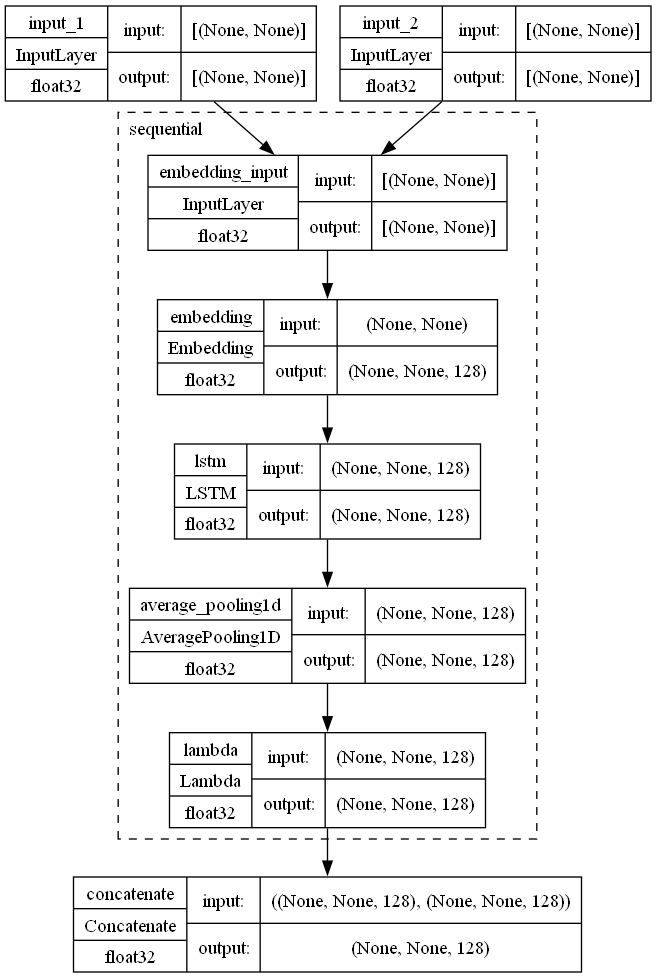

In [4]:
tf.keras.utils.plot_model(
    Siamese,
    to_file="./images/l1-model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True
)

Try changing the parameters defined before the Siamese model and see how it changes!

You will actually train this model in this week's assignment. For now you should be more familiarized with creating Siamese models using TensorFlow. **Keep it up!**